In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import linear_model

In [2]:
X = np.array([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
                         7.042,10.791,5.313,7.997,5.654,9.27,3.1])
Y = np.array([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
                         2.827,3.465,1.65,2.904,2.42,2.94,1.3])

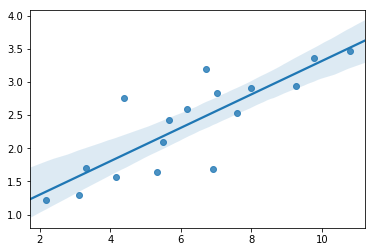

In [3]:
sns.regplot(x=X, y=Y)

In [4]:
# Least squares polynomial fit
# Returns slope and intercept
res = np.polyfit(x=X, y=Y, deg=1)
res

array([0.25163494, 0.79880123])

In [5]:
np.poly1d(c_or_r=res)

poly1d([0.25163494, 0.79880123])

In [6]:
reg = linear_model.LinearRegression()
reg.fit(X=X.reshape(-1, 1), y=Y.reshape(-1, 1))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

# Advertising Data Excersise

In [7]:
df = pd.read_csv('Advertising.csv')
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


### Features
In this case the dollars spent on promoting via TV, radio, and newspaper respectively.
### The target (response)
The sales based on the given features. 

In [19]:
X = df.loc[:, ['TV', 'radio', 'newspaper']]
Y = df['sales']

In [9]:
reg = linear_model.LinearRegression()
adv_reg = reg.fit(X, Y)

In [10]:
adv_reg.predict([[100, 25, 25]])

array([12.20266701])

### Streatch challenge: Find linear_model using numpy

In [11]:
# Different way of doing it
import statsmodels.formula.api as smf

In [12]:
# # create a fitted model with all three features
# lm = smf.ols(formula='sales - TV + radio + newspaper', data=df).fit()

# # Print the coefficient
# lm.params

In [21]:
from sklearn.metrics import r2_score
score = reg.score(X, Y)
score = r2_score(Y, reg.predict(X))
print(score)

0.8972106381789522


### R squared is how accurate your model is in describing you data
It ranges from 0 to 1

If R squared is bad for linear regression, we can try to play with different regression kernels:

In [26]:
from sklearn import svm
clf_p = svm.SVR(kernel='linear')
clf_p.fit(X, Y)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)